# DIABETES: STATISTICAL ANALYSIS AND PREDICTION

## About Dataset
## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## Source
[Kaggle dataset on Diabetes](https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data)

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the data

In [695]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [696]:
df.shape

(768, 9)

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Our dataset has 768 examples with 9 columns/features. All columns are numeric. There's no missing data.

Now let's get a general description of the data.

In [698]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the descriptive summary table, I noticed the minimum value for Glucose is 0. This is also true for a number of columns. While it is perfectly normal for a person be 0 times Pregnant, it is a bit suspicious for a person to have Glucose of 0 mg/dl, or a BMI of 0 kg/m2

Pregnancies has a high value of 17. Let's do a value_counts on Pregnancies to get an idea what we're dealing with.

In [699]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### Dealing With Zero Entries
Check proportion of entries that is zero. While a zero entry for some features such as pregnancy is valid (the person has never been pregnant before), others need to be looked at again.

In [700]:
col_names = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in col_names:
    num_zero = (df[col] == 0).sum()
    num_percent = (df[col] == 0).sum()/df.shape[0]
    print(f'{col} has {num_zero} zero entries or {num_percent:.2%}')


Glucose has 5 zero entries or 0.65%
BloodPressure has 35 zero entries or 4.56%
SkinThickness has 227 zero entries or 29.56%
Insulin has 374 zero entries or 48.70%
BMI has 11 zero entries or 1.43%


Almost 50% of the entries for Insulin is a 0. While this can be expected in cases of Type 1 Diabetes, Severe hypoglycemia, or in some other metabolic disorders, a reading of 0 mg/dL (or mmol/L) for blood glucose or a zero reading for blood pressure is biologicall impossible. Likewise BMI and Skin thickness. 

NOTE: Almost 50% of Insulin entries being 0 is a very concerning factor. However, given that the authors of the data cannot be contacted to clarify this, we'll just leave it as that. 

### Replace zeroes with column mean

In [701]:
col_mean = df[[col for col in col_names if col != "Insulin"]].replace(0, np.nan).mean() # Replace 0 with nan to prevent mean calculation distortion
df[col_names] = df[col_names].replace(0, col_mean)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check 'Outcome' Distribution.

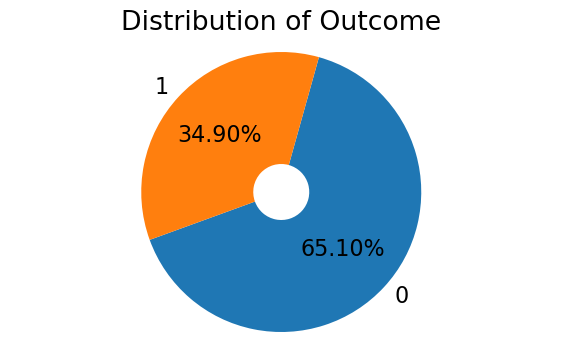

In [702]:
counts = df['Outcome'].value_counts()

plt.figure(figsize=(7, 4))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=200, wedgeprops={'width': 0.8})
plt.title('Distribution of Outcome')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## FEATURE ENGINEERING
This dataset consist of results for laboratory or clinical investigation. These results can be interpreted into various categories such as normal, or abnormal. Or in the case of BMI, into underweight, normal, overweight, or obese.

### Pregnancies Classification

In [703]:
# Let's create bins for our Pregnancies categorization.
bins = [0, 1, 3, 20]
labels = ['No Pregnancy', '1-2 Pregnancies', 'More than 2 Pregnancies']
df['CAT_Pregnancies'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels, right=False)

### [Glucose Classification](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380)

In [704]:
# Let's create bins for our glucose categorization.
bins = [0, 100, 125, 400]
labels = ['Normal', 'Pre-diabetic', 'Diabetic']
df['CAT_Glucose'] = pd.cut(df['Glucose'], bins=bins, labels=labels, right=False)

### [Blood Pressure Classification](https://my.clevelandclinic.org/health/diagnostics/17649-blood-pressure)

In [705]:
# Let's create bins for our blood pressure categorization.
# This assumes that the data presented is Diastolic Blood pressure readings.
bins = [0, 80, 120, 200]
labels = ['Normal', 'Pre-hypertension', 'Hypertensive Crises']
df['CAT_BloodPressure'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels, right=False)

### [Insulin Classification](https://emedicine.medscape.com/article/2089224-overview?form=fpf#a1)

In [706]:
# Let's create bins for our insulin categorization.
bins = [0, 167, 1000]
labels = ['Normal', 'High']
df['CAT_Insulin'] = pd.cut(df['Insulin'], bins=bins, labels=labels, right=False)


### [BMI Classification](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html)

In [707]:
# Let's create bins for our BMI categorization.
bins = [0, 18.6, 25.0, 30.0, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['CAT_BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [708]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CAT_Pregnancies,CAT_Glucose,CAT_BloodPressure,CAT_Insulin,CAT_BMI
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1,More than 2 Pregnancies,Diabetic,Normal,Normal,Obese
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0,1-2 Pregnancies,Normal,Normal,Normal,Overweight
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1,More than 2 Pregnancies,Diabetic,Normal,Normal,Normal
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,1-2 Pregnancies,Normal,Normal,Normal,Overweight
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,No Pregnancy,Diabetic,Normal,High,Obese


## STATISTICAL ANALYSIS

### Histogram Showing Distribution of Numerical Columns per Outcome

In [709]:
cat_cols = ['CAT_Pregnancies', 'CAT_Glucose', 'CAT_BloodPressure', 'CAT_Insulin', 'CAT_BMI']
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

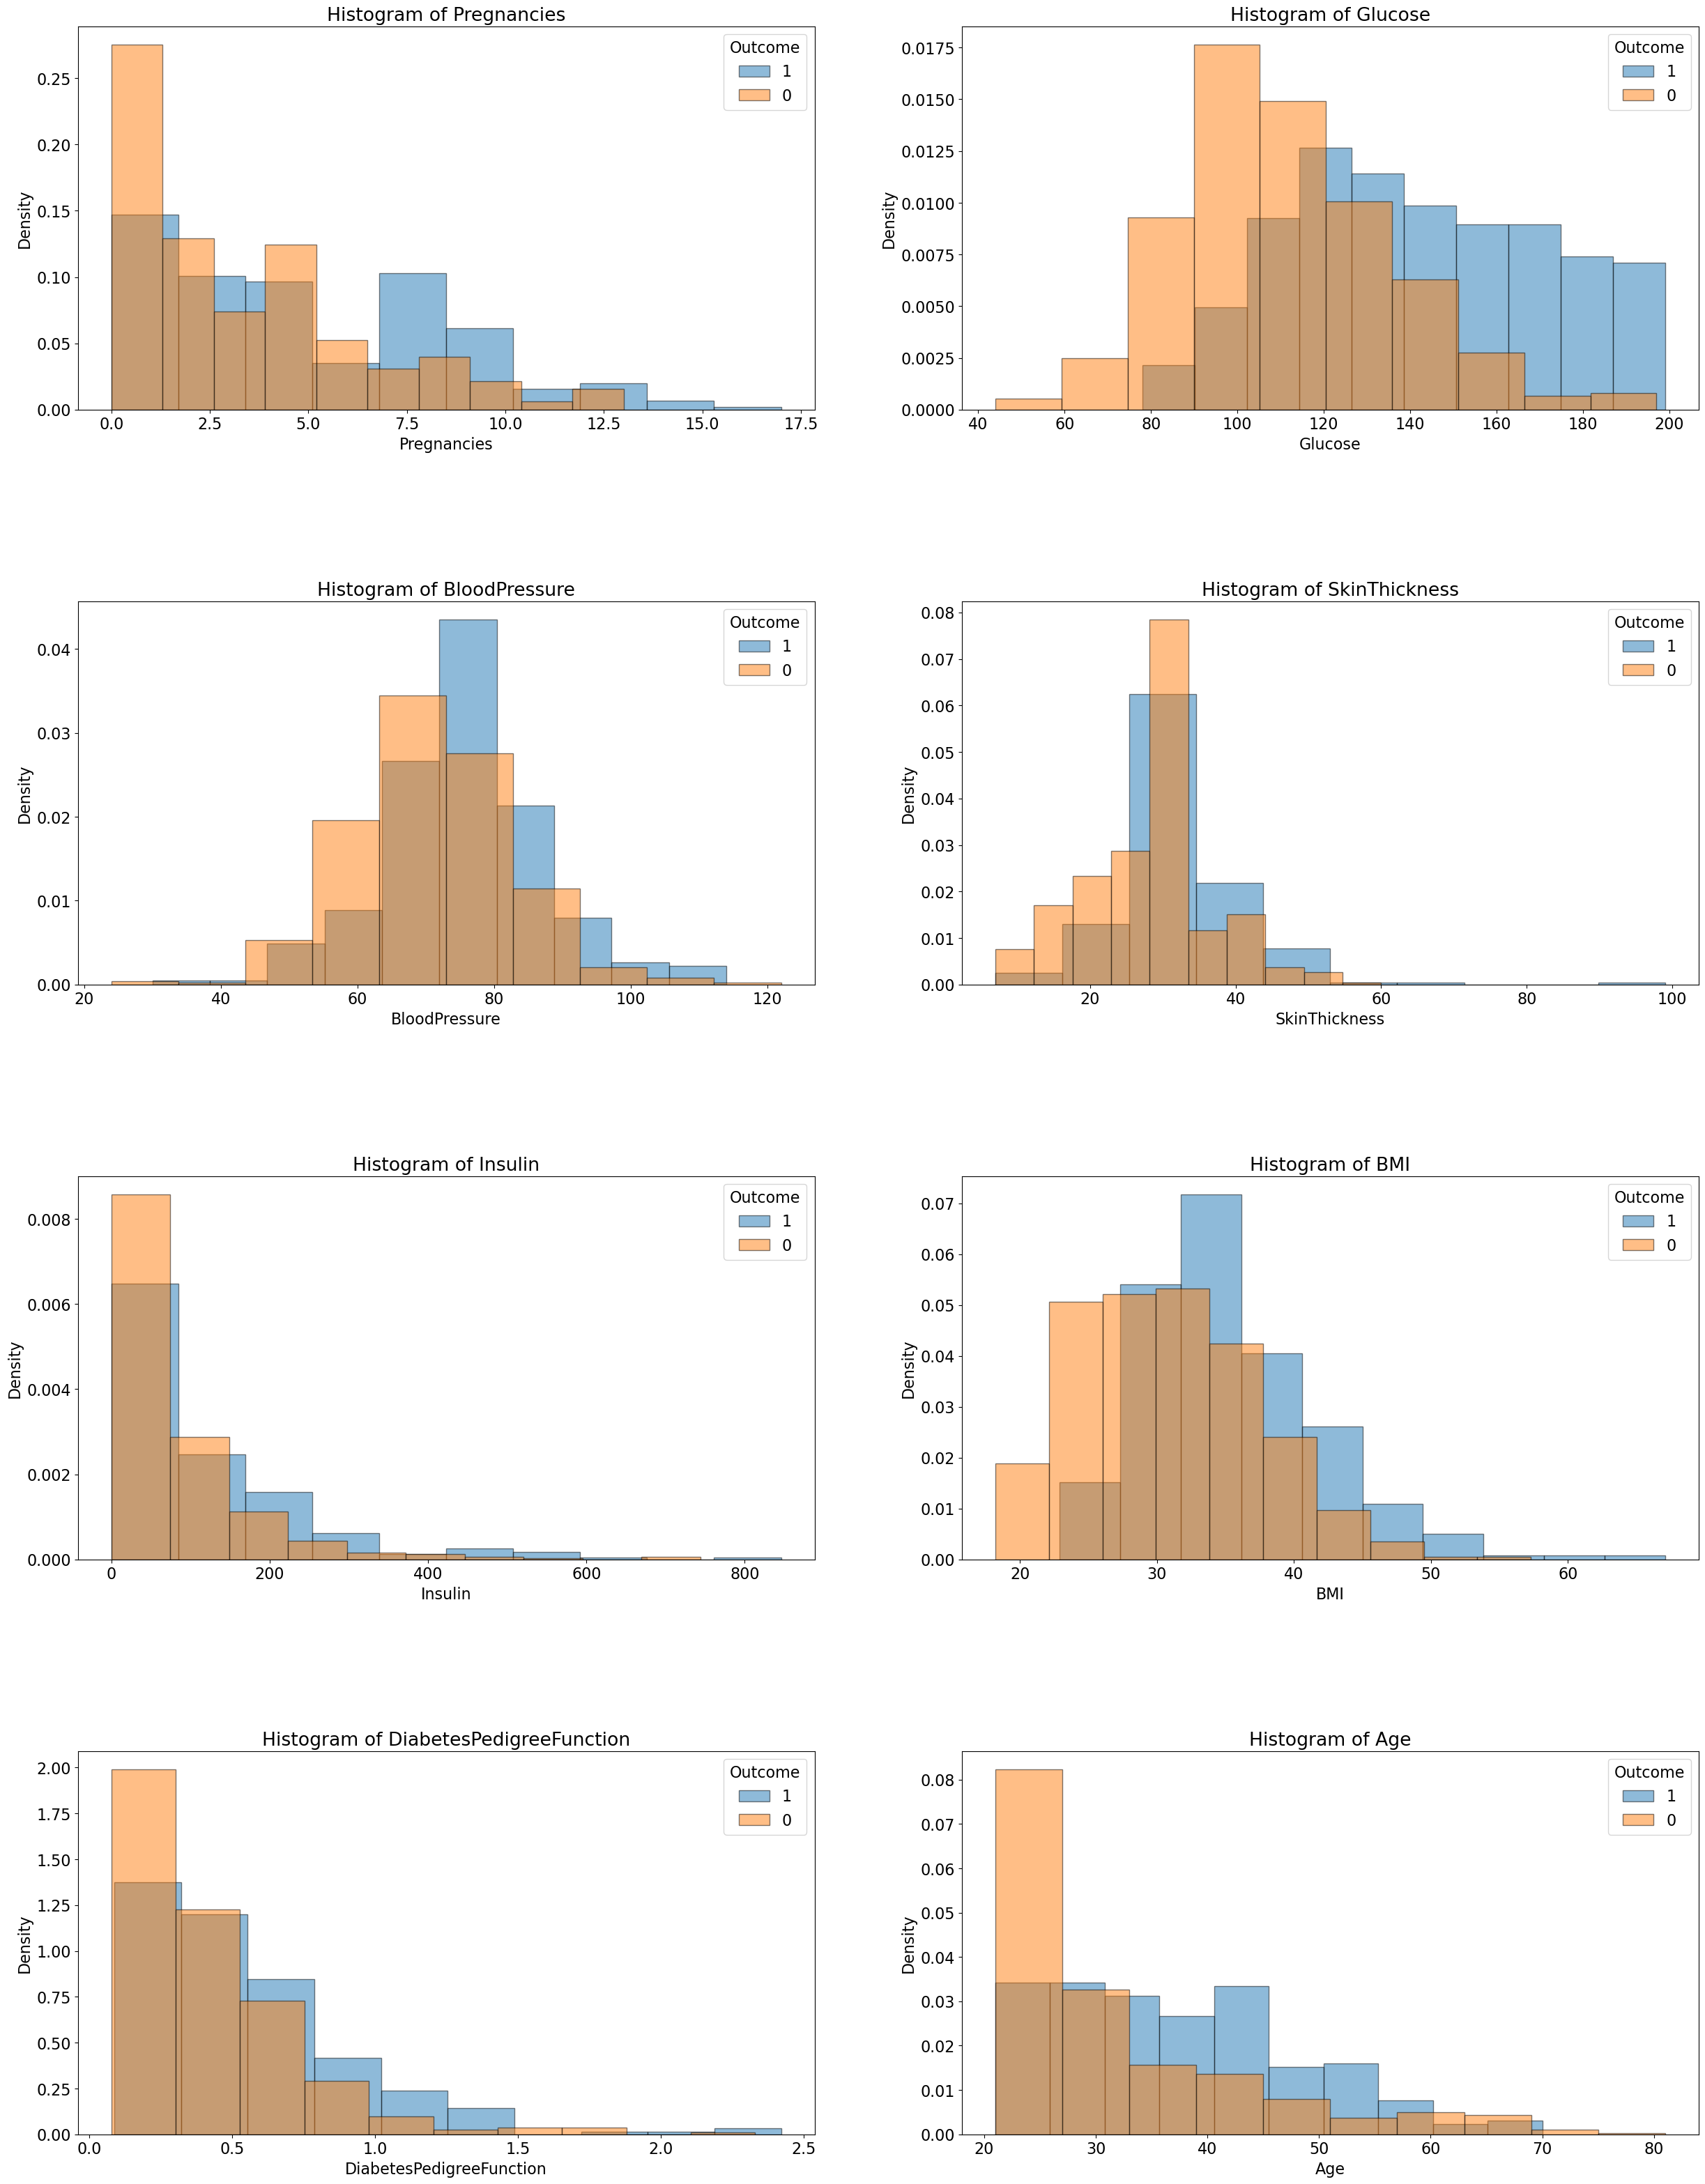

In [710]:
from matplotlib import rcParams

rcParams.update({'font.size': 16})

plt.figure(figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)

# Plot histograms with KDE
for i, name in enumerate(num_cols):
    plt.subplot(5, 2, i + 1)

    # Plot histogram
    for outcome in df['Outcome'].unique():
        subset = df[df['Outcome'] == outcome]
        plt.hist(subset[name], bins=10, alpha=0.5, label=outcome, density=True, edgecolor='black')

    plt.title(f'Histogram of {name}')
    plt.xlabel(name)
    plt.ylabel('Density')
    plt.legend(title='Outcome')

plt.show()


### Bar Graph Showing Distribution of Categorical Columns per Outcome
Let's first create a graph showing the percentage distribution of these columns per Outcome. As always, plotting the raw frequencies does not give a good idea about the distribution. In order to demonstrate this better, I'd plot both a bar graph with the frequencies and also percentages.

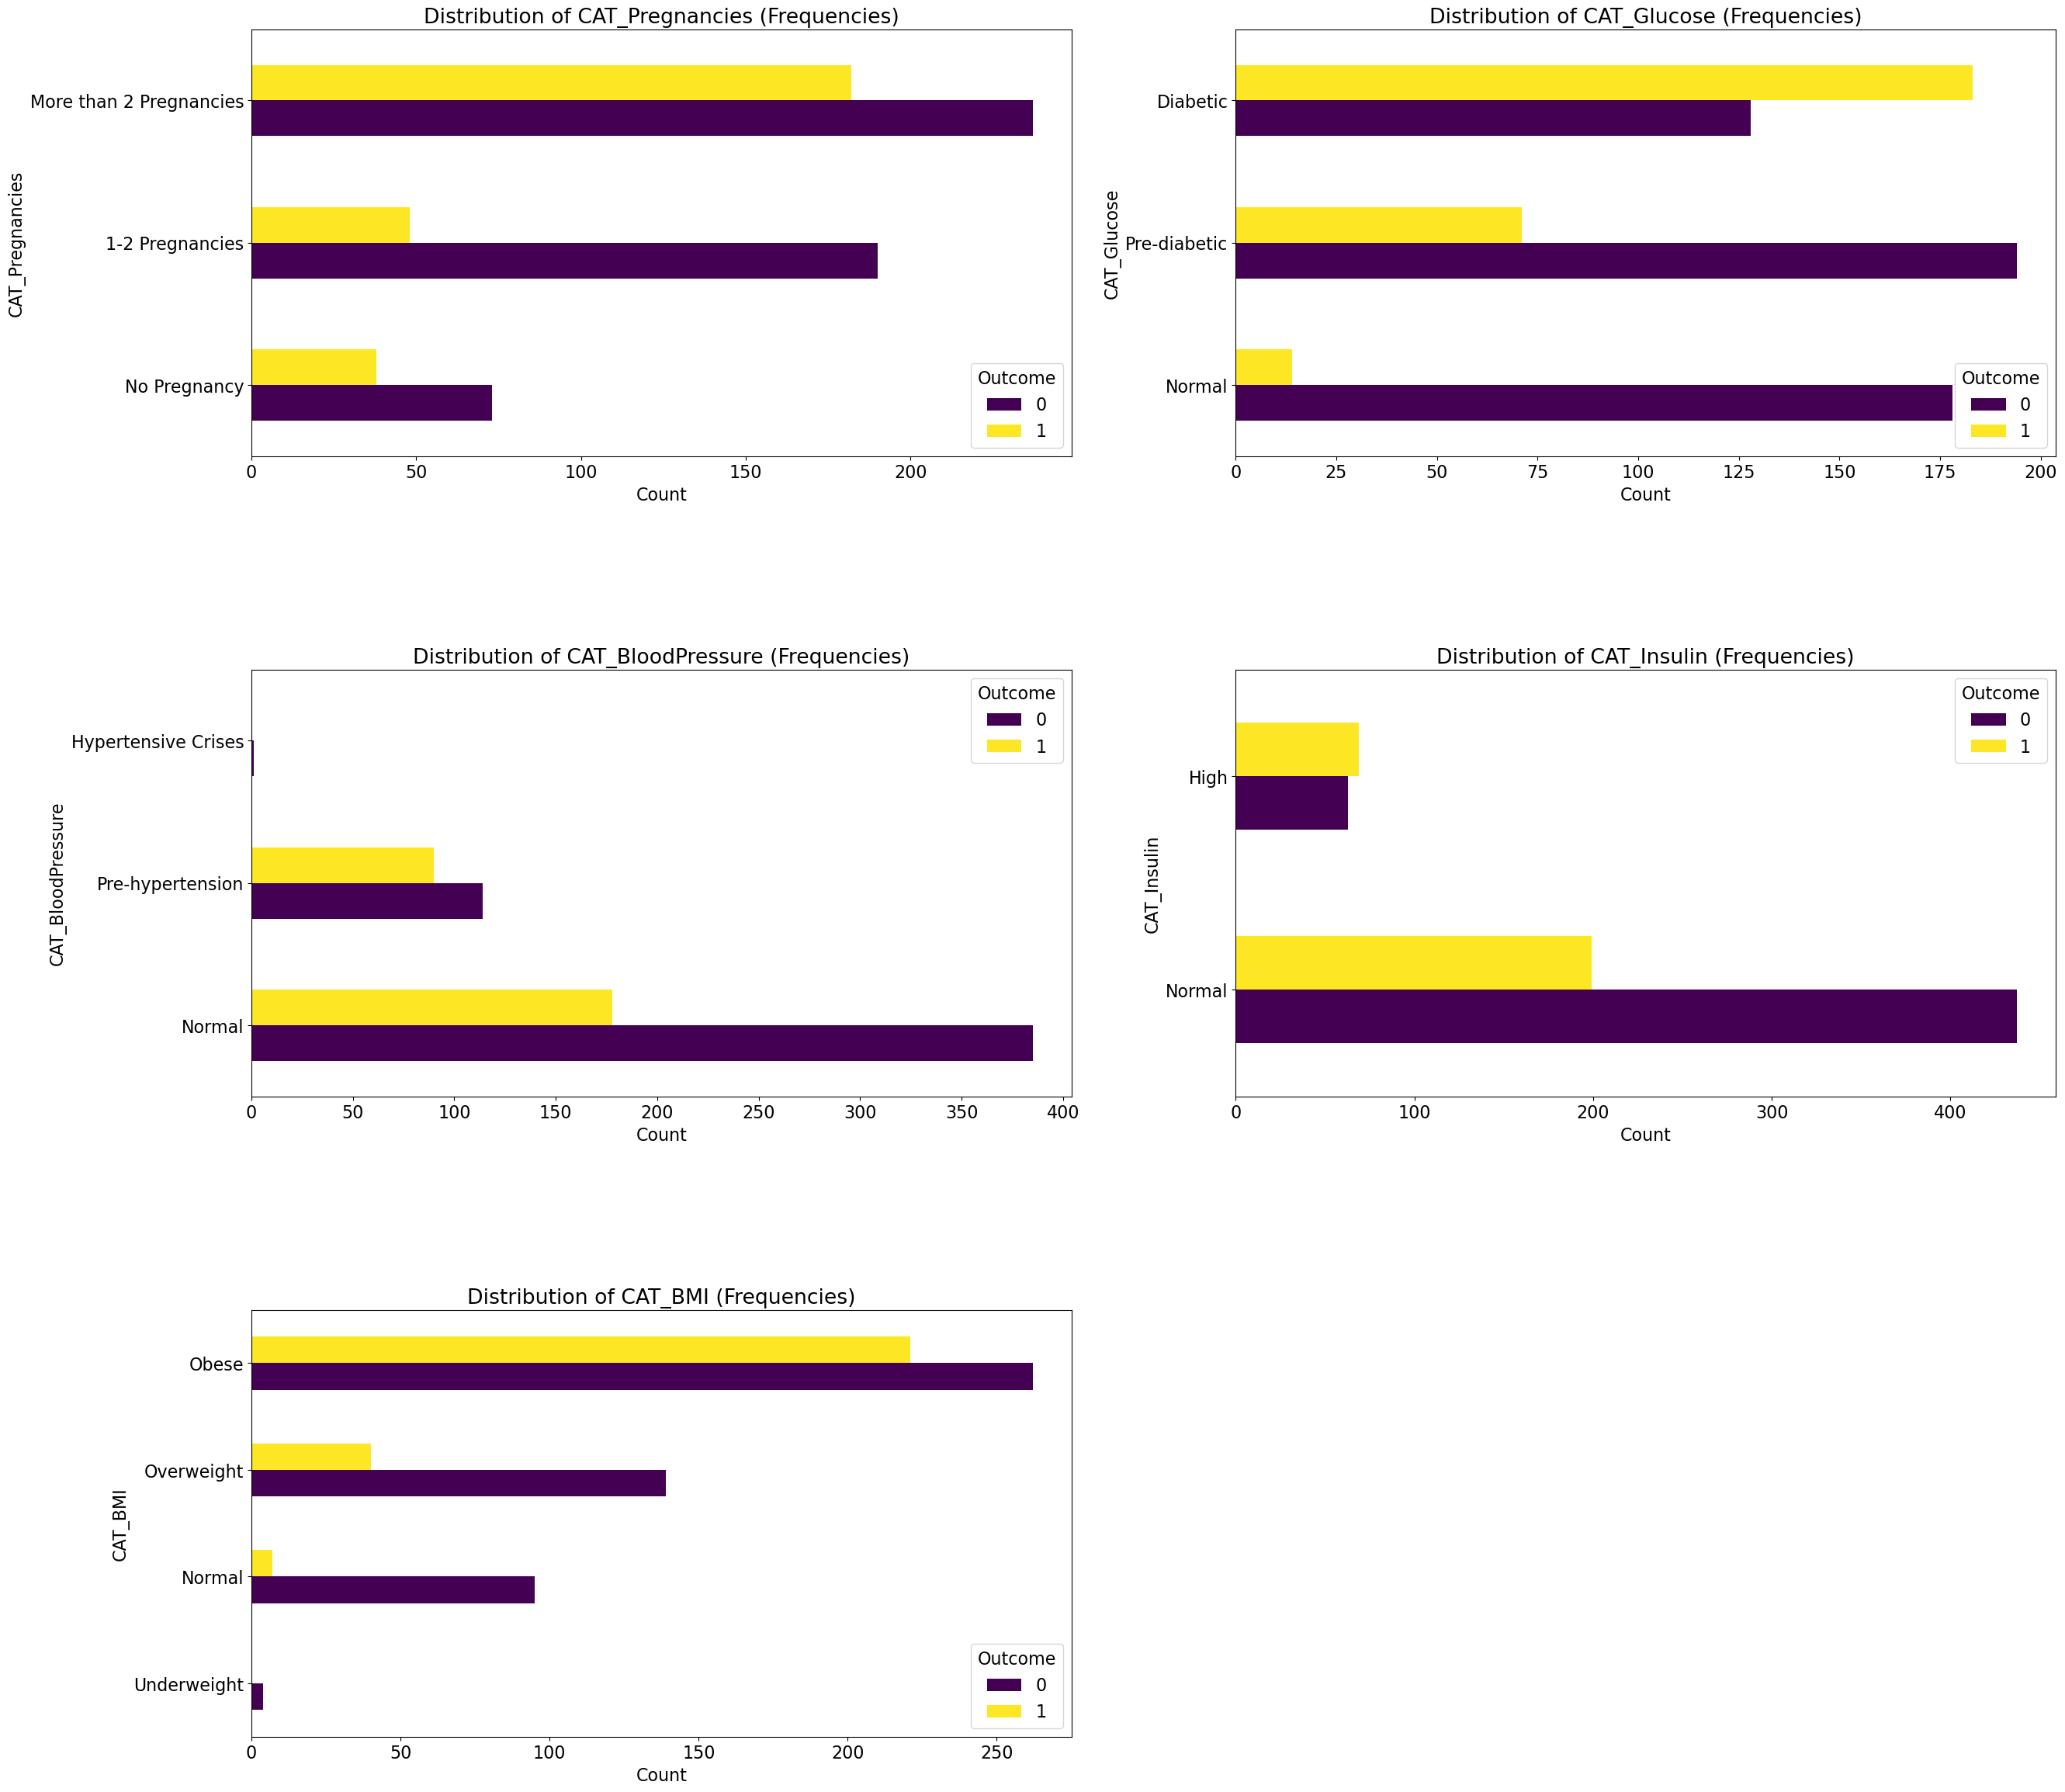

In [711]:
# Set figure size and style
plt.figure(figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)

# Plot horizontal barplots
for i, name in enumerate(cat_cols):
    plt.subplot(5, 2, i + 1)

    # Calculate counts for each category in the column
    counts = df.groupby([name, 'Outcome'], observed=False).size().unstack(fill_value=0)

    # Plotting
    counts.plot(kind='barh', stacked=False, ax=plt.gca(), colormap='viridis')

    plt.title(f'Distribution of {name} (Frequencies)')
    plt.xlabel('Count')
    plt.ylabel(name)

plt.show()

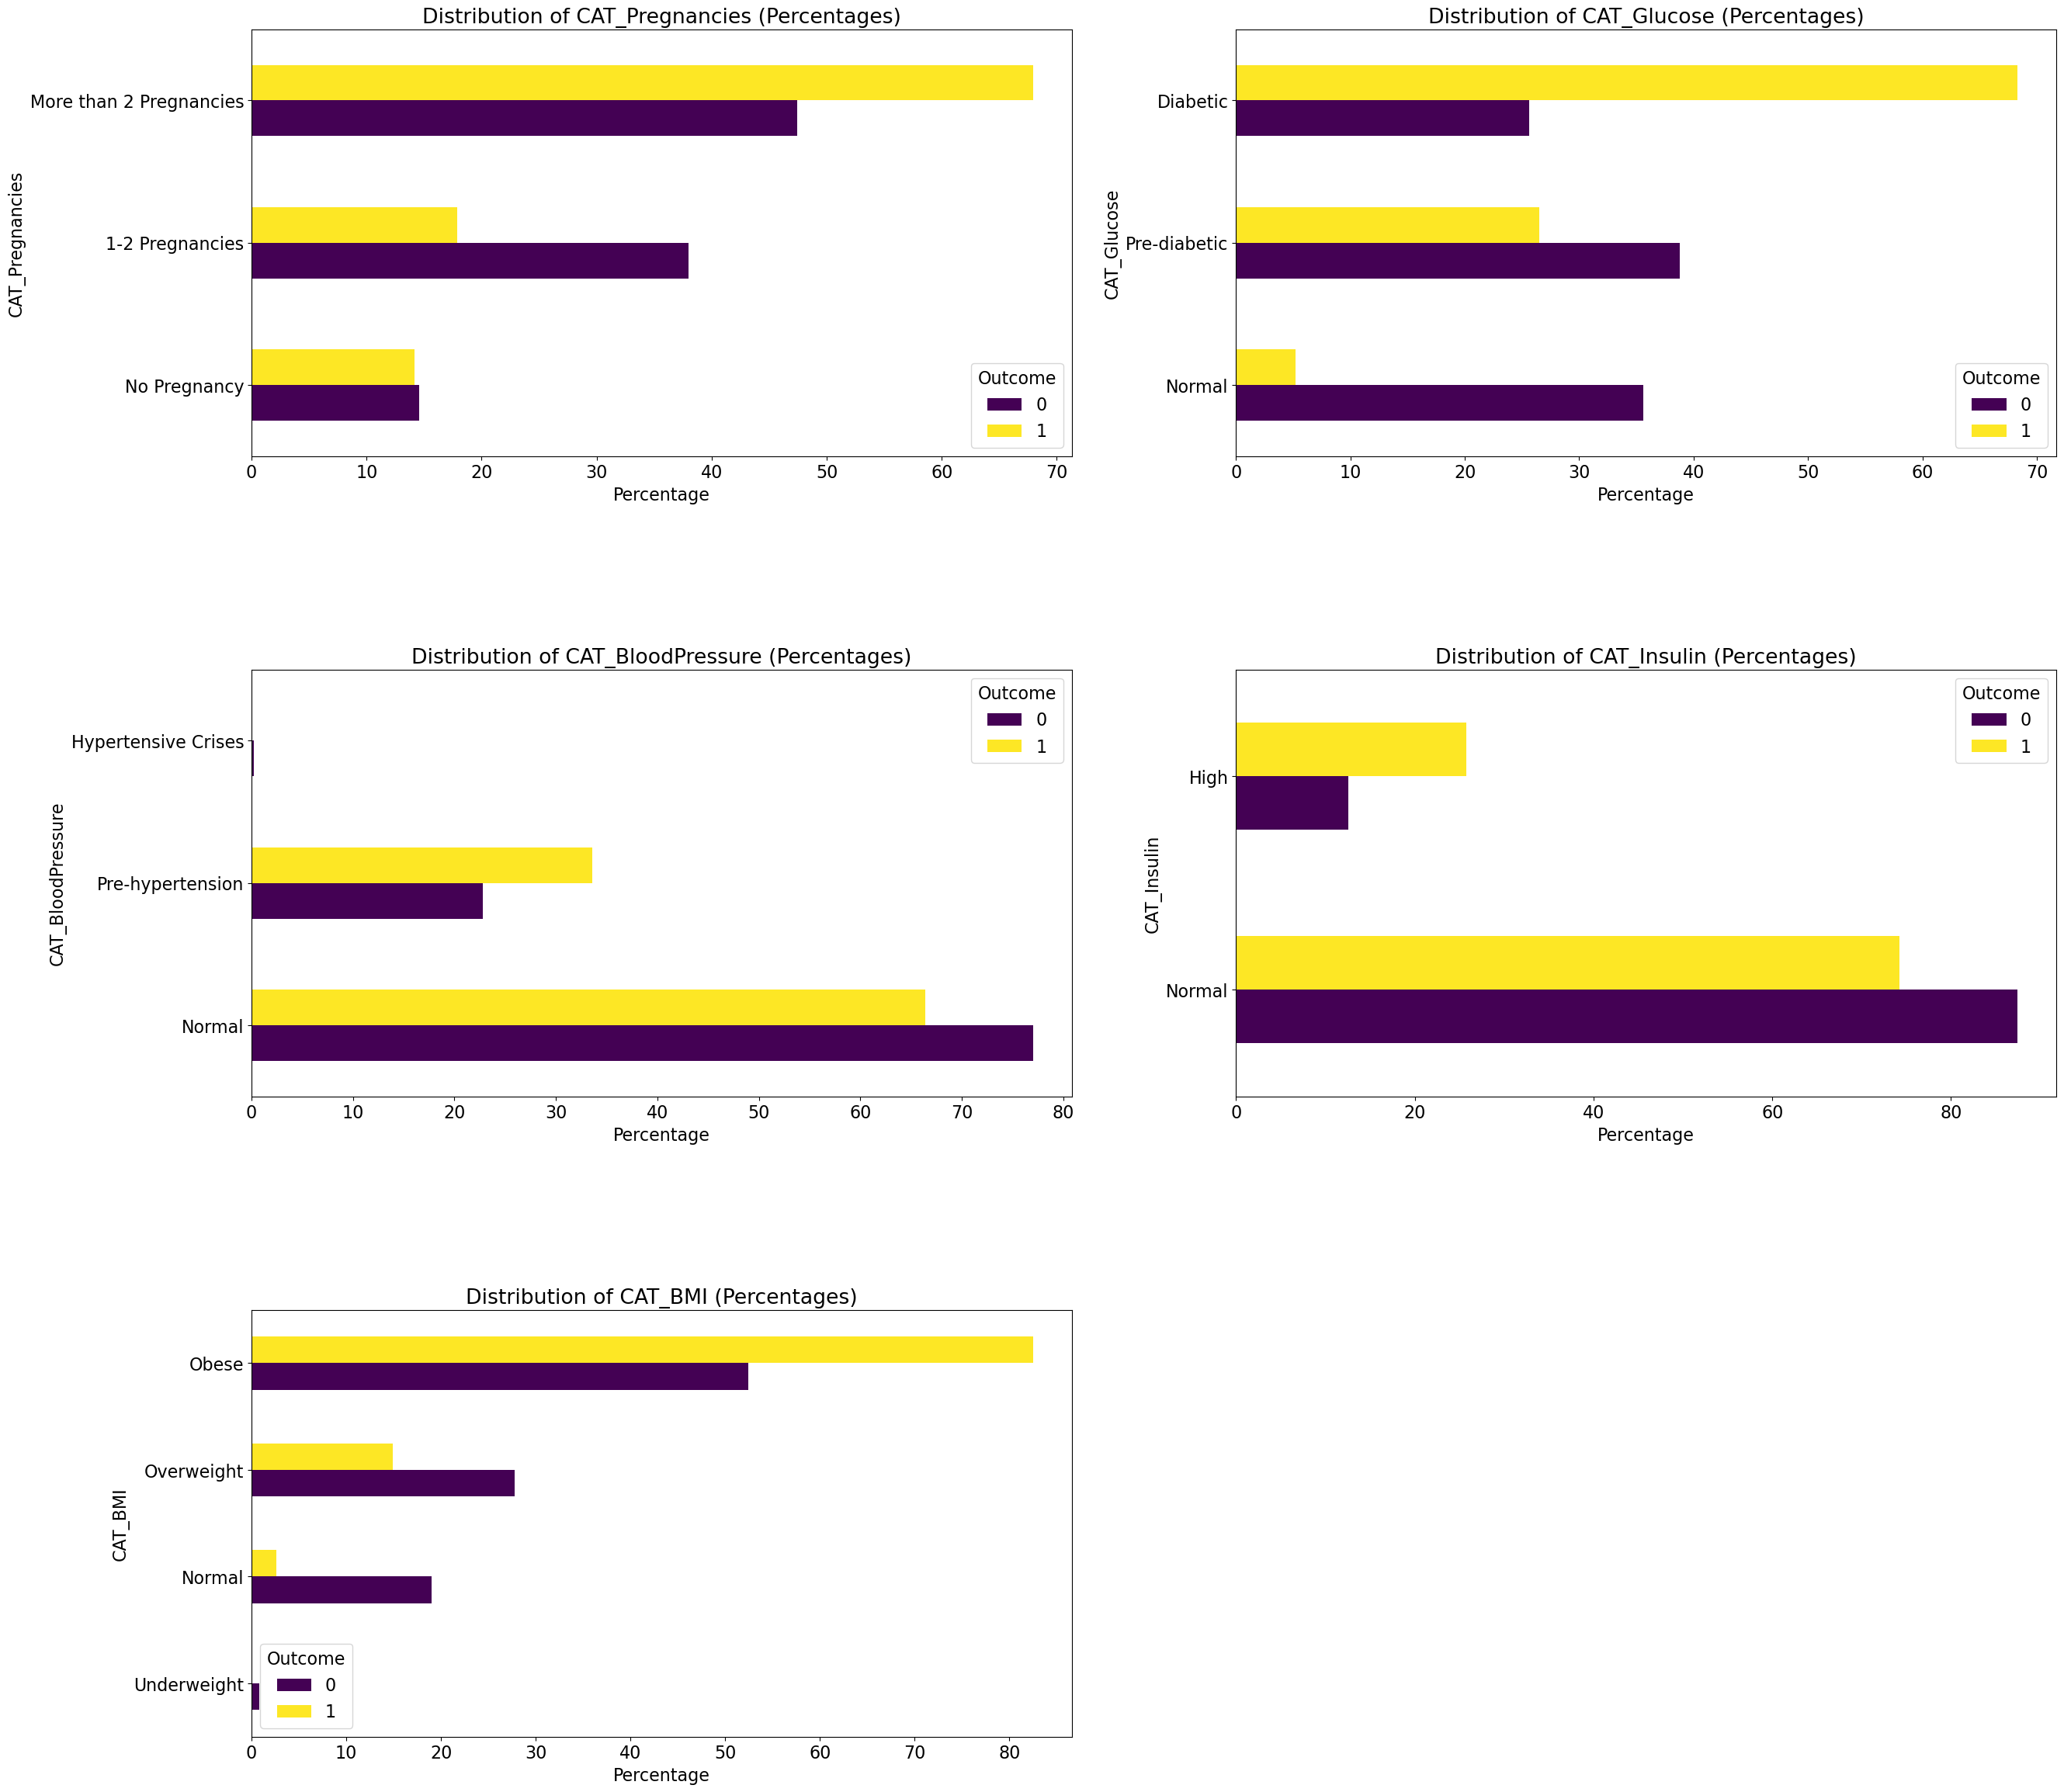

In [712]:
# Set figure size and style
plt.figure(figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)

# Plot horizontal barplots
for i, col in enumerate(cat_cols):
    plt.subplot(5, 2, i + 1)

    # Calculate counts for each category in the column
    counts = df.groupby([col, 'Outcome'], observed=False).size().unstack(fill_value=0)

    # Calculate percentage for each category
    percentage = counts.div(counts.sum(axis=0), axis=1) * 100

    # Plotting
    percentage.plot(kind='barh', ax=plt.gca(), colormap='viridis')

    plt.title(f'Distribution of {col} (Percentages)')
    plt.xlabel('Percentage')
    plt.ylabel(col)

plt.show()

If we compare the two graphs, we can see a better distribution of the outcome. Now let's get a chi-square contingency table to understand if there is a statistically significant correlation in this data.

### Chi-square Contingency *Table*

In [713]:
from scipy.stats import chi2_contingency

In [714]:
# Function to help us calculate the frequency and percentages in our contingency tabel.
def cal_percentage(table):
    col_sums = table.sum(axis=0)
    table_formated = table.copy()

    for col in table.columns:
        for idx in table.index:
            value = table.at[idx, col]
            total = col_sums[col]
            percentage = (value / total) * 100 if total != 0 else 0
            table_formated.at[idx, col] = f"{value} ({percentage:.2f}%)"

    return table_formated

# Function to create Chi_square contingency table
def chi2_table(df, column, target):

    table = pd.crosstab(df[column], df[target]) # Creating a crosstable and assigning it to the table
    table['Total'] = table.values.sum(axis=1) # Adding the total across rows to the table

    table_formated = cal_percentage(table)


    # Performing a Chi-square contingency analysis to determine the strength of association between factor and target
    table_values = table.values
    chi2, p, dof, exact = chi2_contingency(table_values)

    table_formated['chi2'] = chi2
    table_formated['p'] = round(p, 4)

    return table_formated


In [715]:
chi2_table(df, 'CAT_Pregnancies', 'Outcome')

Outcome,0,1,Total,chi2,p
CAT_Pregnancies,,,,,
No Pregnancy,73 (14.60%),38 (14.18%),111 (14.45%),36.198206,0.0
1-2 Pregnancies,190 (38.00%),48 (17.91%),238 (30.99%),36.198206,0.0
More than 2 Pregnancies,237 (47.40%),182 (67.91%),419 (54.56%),36.198206,0.0


As we can see, CAT_Pregnancy is significantly correlated with Outcome with a p-value < 0.001

Let's create a larger combined chi_square contingency table for all our categorical columns

In [716]:

def combined_crosstabs(df, columns, target):
    tables = []

    for i, column in enumerate(columns):

        if column in df.columns:
            table = chi2_table(df, column, target)

            # Adding an identifying column to the table.
            table['Factor'] = column

            tables.append(table)
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

        # Combining the tables
    combined_tables = pd.concat([table for table in tables])

        # Reseting the Index
    combined_tables.reset_index(inplace=True)
    combined_tables.rename(columns={'index': 'Categories'}, inplace=True)

    # Reordering the columns so that 'Table' becomes the first column
    cols = ['Factor'] + [col for col in combined_tables.columns if col != 'Factor']
    combined_tables = combined_tables[cols]


    return combined_tables


In [717]:
crosstab = combined_crosstabs(df, cat_cols, 'Outcome')
crosstab

Outcome,Factor,Categories,0,1,Total,chi2,p
0,CAT_Pregnancies,No Pregnancy,73 (14.60%),38 (14.18%),111 (14.45%),36.198206,0.0000
1,CAT_Pregnancies,1-2 Pregnancies,190 (38.00%),48 (17.91%),238 (30.99%),36.198206,0.0000
2,CAT_Pregnancies,More than 2 Pregnancies,237 (47.40%),182 (67.91%),419 (54.56%),36.198206,0.0000
3,CAT_Glucose,Normal,178 (35.60%),14 (5.22%),192 (25.00%),150.556157,0.0000
4,CAT_Glucose,Pre-diabetic,194 (38.80%),71 (26.49%),265 (34.51%),150.556157,0.0000
5,CAT_Glucose,Diabetic,128 (25.60%),183 (68.28%),311 (40.49%),150.556157,0.0000
6,CAT_BloodPressure,Normal,385 (77.00%),178 (66.42%),563 (73.31%),10.837514,0.0285
7,CAT_BloodPressure,Pre-hypertension,114 (22.80%),90 (33.58%),204 (26.56%),10.837514,0.0285
8,CAT_BloodPressure,Hypertensive Crises,1 (0.20%),0 (0.00%),1 (0.13%),10.837514,0.0285
9,CAT_Insulin,Normal,437 (87.40%),199 (74.25%),636 (82.81%),21.185561,0.0000


As we can see, all the categorical variables are significantly correlated with Diabetes. 

## Indepedent T-test Analysis

In [718]:
from scipy.stats import ttest_ind, levene

In [719]:
def t_test_table(df, columns, target):
    tables = []
    category1, category2 = df[target].unique()
    
    for column in columns:
        cat1_column = df[df[target] == category1][column]
        cat2_column = df[df[target] == category2][column]

        # Calculating mean and standard deviation for each category
        cat1_mean, cat1_std = cat1_column.mean(), cat1_column.std()
        cat2_mean, cat2_std = cat2_column.mean(), cat2_column.std()
        
        # Levene's test for homogeneity of variances
        levene_stat, levene_p = levene(cat1_column, cat2_column)
        
        # Independent t-test
        t_stat, p_value = ttest_ind(cat1_column, cat2_column, equal_var=(levene_p > 0.05))
        
        # Creating a DataFrame for the current column
        table = pd.DataFrame({
            'Factor': [column, column],
            target: [category1, category2],
            'Mean': [cat1_mean, cat2_mean],
            'Std': [cat1_std, cat2_std],
            'Levene_stat': [levene_stat, None],
            'Levene_p': [round(levene_p, 4), None],
            'T_stat': [t_stat, None],
            'P_value': [round(p_value, 4), None]
        })
        
        tables.append(table)
    
    return pd.concat(tables, ignore_index=True)

In [672]:
t_table = t_test_table(df, num_cols, 'Outcome')
t_table

,Factor,Outcome,Mean,Std,Levene_stat,Levene_p,T_stat,P_value
0,Pregnancies,1,4.865672,3.741239,22.747167,0.0000,5.906961,0.000
1,Pregnancies,0,3.298000,3.017185,NaN,NaN,NaN,NaN
2,Glucose,1,142.165573,29.541750,23.533387,0.0000,14.864182,0.000
3,Glucose,0,110.710121,24.717060,NaN,NaN,NaN,NaN
4,BloodPressure,1,75.147324,11.945712,0.163940,0.6857,4.661099,0.000
5,BloodPressure,0,70.935397,11.931033,NaN,NaN,NaN,NaN
6,Insulin,1,100.335821,138.689125,17.816198,0.0000,3.300895,0.001
7,Insulin,0,68.792000,98.865289,NaN,NaN,NaN,NaN
8,BMI,1,35.384757,6.595065,1.398382,0.2374,9.086387,0.000
9,BMI,0,30.888434,6.504779,NaN,NaN,NaN,NaN


The independent t-test analysis also indicates the all the parameters are significantly correlated with Diabetes. That is, increasing 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' are all significantly correlated with being diagnosed with Diabetes. 

## SCALING & TRAIN_TEST_SPLIT

In [720]:
X = df.drop(columns ='Outcome')
y = df['Outcome']

Let's get the columns with the categorical and numerical features.

In [721]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_data = onehot_encoder.fit_transform(X[cat_cols])

# Convert the encoded data to a DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(cat_cols))

# Drop the original categorical columns from X
X_encoded = X.drop(columns=cat_cols)

# Combine the numerical data with the encoded categorical data
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

X_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CAT_Pregnancies_1-2 Pregnancies,CAT_Pregnancies_More than 2 Pregnancies,...,CAT_Glucose_Pre-diabetic,CAT_BloodPressure_Hypertensive Crises,CAT_BloodPressure_Normal,CAT_BloodPressure_Pre-hypertension,CAT_Insulin_High,CAT_Insulin_Normal,CAT_BMI_Normal,CAT_BMI_Obese,CAT_BMI_Overweight,CAT_BMI_Underweight
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [514]:
import joblib
joblib.dump(onehot_encoder, 'diabetes_onehot_encoder.joblib')

['diabetes_onehot_encoder.joblib']

### Scaling Numerical Features
Instead of using StandardScaler or MinMaxScaler to scale our numerical features, we'd instead use QuantileTransformer, which is a Non-parametric transformer. That is, it does not assume the data follows any particular distribution and is able to handle outliers efficientl.

It scales the features and maps them to follow a normal distribution, in this case, the Gaussian distribution as denoted by output_distribution='normal'. I have run this notebook and compared the accuracy of both QuantileTransformer and StandardScaler, and saw QuantileTransformer provides better predictive accuracy at single digit percentage points higher than StandardScaler or MinMaxScaler. 

In [722]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

In [516]:
joblib.dump(scaler, 'diabetes_minmax_scaler.pkl')

['diabetes_minmax_scaler.pkl']

In [517]:
X_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CAT_Pregnancies_1-2 Pregnancies,CAT_Pregnancies_More than 2 Pregnancies,...,CAT_Glucose_Pre-diabetic,CAT_BloodPressure_Hypertensive Crises,CAT_BloodPressure_Normal,CAT_BloodPressure_Pre-hypertension,CAT_Insulin_High,CAT_Insulin_Normal,CAT_BMI_Normal,CAT_BMI_Obese,CAT_BMI_Overweight,CAT_BMI_Underweight
0,0.666564,0.873569,-0.076032,0.852495,-5.199338,0.239380,0.678858,1.220640,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.731217,-1.335178,-0.559592,-0.389414,-5.199338,-0.799083,-0.059586,0.139710,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.096804,1.708508,-0.731217,0.012660,-5.199338,-1.434020,0.788098,0.203961,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.731217,-1.167475,-0.559592,-0.799083,0.426762,-0.567010,-1.258282,-5.199338,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-5.199338,0.574460,-2.405245,0.852495,0.965625,1.447963,2.903113,0.269066,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Train_Test_Split

In [723]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

In [724]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 23), (308, 23), (460,), (308,))

## MODEL SELECTION 

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, ConfusionMatrixDisplay

In [693]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    result = {'name': name, 'accuracy': accuracy, 'recall': recall, 'precision': precision, 'auc': auc}
    results.append(result)
    
results = pd.DataFrame(data=results)
results

,name,accuracy,recall,precision,auc
0,LogisticRegression,0.750000,0.607843,0.626263,0.714116
1,SVC,0.766234,0.686275,0.636364,0.746050
2,KNeighbors,0.730519,0.568627,0.597938,0.689654
3,RandomForest,0.782468,0.686275,0.666667,0.758186
4,DecisionTree,0.688312,0.568627,0.527273,0.658100


As we can see, the best model for our data is the RandomForestClassifier with an accuracy score of 78.25% with the highest ranked precision and recall values, as well as AUC.

## Tuning Hyperparameters

In [522]:
from sklearn.model_selection import GridSearchCV

In [610]:
param_grid = {
    'n_estimators':[10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\huber\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\huber\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huber\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\huber\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\huber\anaconda3\lib\site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [611]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 10}

In [612]:
rf_model = grid_search.best_estimator_

In [613]:
rf_model.score(X_train,y_train), rf_model.score(X_test, y_test)

(0.8326086956521739, 0.7954545454545454)

In [614]:
joblib.dump(rf_model, 'diabetes_rf_model.joblib')

['diabetes_rf_model.joblib']

## Creating a Confusion Matrix to Visualize the Model's Predictions

<Figure size 1000x700 with 0 Axes>

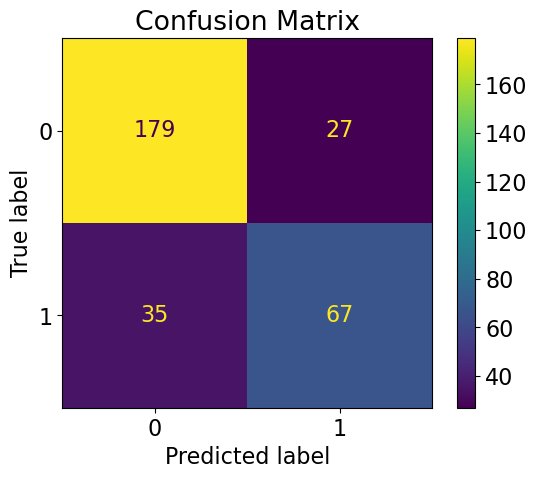

In [260]:
#prediction
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()